# Phishing Website Detection

"A Comparative Study of Naive Bayes, Decision Trees, and Support Vector Machines(SVC) via Feature Engineering, Feature Selection, Cross-Validation, Nested Cross-Validatioon and Hyperparameter Tuning.”



## 1. Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading database
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PhiUSIIL_Phishing_URL_Dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [2]:
#size of the data (intances, features)
df.shape

(235795, 56)

In [3]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [4]:
# Taking subset of the dataset
df = df.sample(n=5500, random_state=42)

(3158, 56)
(2342, 56)
total 5500
label
1    3158
0    2342
Name: count, dtype: int64


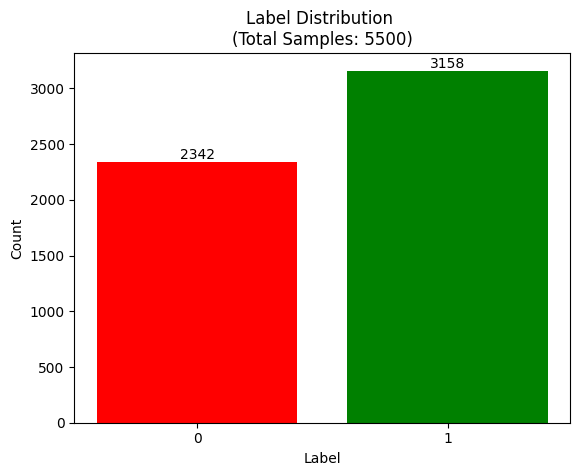

In [5]:
#visual the label comprising legitimate and phishing URLs.
pos_df = df.loc[df['label']== 1]
print(pos_df.shape)
zero_df = df.loc[df['label']== 0]
print(zero_df.shape)

print("total", df.shape[0])

label_counts = df['label'].value_counts()
print(label_counts)

#plottig bar chart
bars = plt.bar(label_counts.index, label_counts.values, color=['green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution \n(Total Samples: {})'.format(df.shape[0]))
plt.xticks([0, 1])  # Ensure only 0 and 1 show on x-axis
plt.show()


## **2.Feature Construction**




### 2.1 Data pre-process

In [6]:
# checking missing data
df = df.drop_duplicates()
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
print("Missing values:")
print(missing_columns)

Missing values:
Series([], dtype: int64)


In [7]:
# get all non numerical data to a table
non_num_df = df.select_dtypes(exclude=['number'])
non_num_df.head()

,FILENAME,URL,Domain,TLD,Title
136221,827598.txt,https://www.northcm.ac.th,www.northcm.ac.th,th,norhcmac
56609,oph00308.txt,https://unitedmartialartscenters.com/at0/mygov...,unitedmartialartscenters.com,com,unitedmartialartscentersat0mygovpersonalhtm
46393,8112660.txt,https://email.mail1.onesignal.os.tc/c/ejwcz02u...,email.mail1.onesignal.os.tc,tc,emailmail1onesignaloscejwcz02untamqohvwmwoczwf...
129746,8135291.txt,http://uqr.to/1il1z,uqr.to,to,uqr1il1z
131464,586561.txt,https://www.woolworthsrewards.com.au,www.woolworthsrewards.com.au,au,woolworthsrewrdscom


In [8]:
non_num_df

,FILENAME,URL,Domain,TLD,Title
136221,827598.txt,https://www.northcm.ac.th,www.northcm.ac.th,th,norhcmac
56609,oph00308.txt,https://unitedmartialartscenters.com/at0/mygov...,unitedmartialartscenters.com,com,unitedmartialartscentersat0mygovpersonalhtm
46393,8112660.txt,https://email.mail1.onesignal.os.tc/c/ejwcz02u...,email.mail1.onesignal.os.tc,tc,emailmail1onesignaloscejwcz02untamqohvwmwoczwf...
129746,8135291.txt,http://uqr.to/1il1z,uqr.to,to,uqr1il1z
131464,586561.txt,https://www.woolworthsrewards.com.au,www.woolworthsrewards.com.au,au,woolworthsrewrdscom
...,...,...,...,...,...
143432,8107343.txt,http://1inch23.net,1inch23.net,net,0
138119,114343.txt,https://www.voaafrique.com,www.voaafrique.com,com,voaafrique
95777,520922.txt,https://www.cnnnewsource.com,www.cnnnewsource.com,com,cnnnewsource
72339,235685.txt,https://www.ggapps.net,www.ggapps.net,net,ggapps


### 2.2 Process TLD

#### 2.2.1 Top 10% of the TLD

In [9]:
tld = non_num_df['TLD'].value_counts()
tld_percentages = non_num_df['TLD'].value_counts(normalize=True).nlargest(10) * 100
tld_percentages
#Top 10 cover more than 70% of the data

,proportion
TLD,
com,48.090909
org,8.218182
app,3.036364
net,2.909091
co,2.563636
uk,2.345455
io,2.000000
de,1.690909
ru,1.563636


In [10]:
# building new feature
top_tlds = df['TLD'].value_counts().nlargest(10).index
df['TLD_Top10'] = df['TLD'].apply(lambda x: 1 if x in top_tlds else 0)

#### 2.2.2 Enumerate the unique values for the TLD

In [11]:
df['TLD'], TLD_unique = pd.factorize(df['TLD'])
print(df['TLD'])

136221     0
56609      1
46393      2
129746     3
131464     4
          ..
143432    20
138119     1
95777      1
72339     20
187093     4
Name: TLD, Length: 5500, dtype: int64


#### 2.2.3 TLD encoding - mean phishing probability

In [12]:
# adding new feature
tld_target_mean = df.groupby('TLD')['label'].mean()

df['TLD_target_encoded'] = df['TLD'].map(tld_target_mean)

#### 2.3.1 process URL count suspicious substrings

In [13]:
# data from https://link.springer.com/article/10.1007/s12652-022-04426-3
# Suspicious words to detect phishing URLs
suspicious_substrings = ["server", "client", "confirm", "account", "banking", "secure", "ebayisapi", "webscr", "login", "signin", "update", "click", "password", "verify", "lucky", "bonus", "suspend", "paypal", "wordpress", "includes", "admin", "alibaba", "myaccount", "dropbox", "themes", "plugins", "logout", "signout", "submit", "limited", "securewebsession", "redirectme", "recovery", "secured", "refund", "webservis", "giveaway", "webspace", "servico", "webnode", "dispute", "review", "browser", "billing", "temporary", "restore", "verification", "required", "resolution", "000webhostapp", "webhostapp", "wp", "content", "site", "images", "js", "css", "view"]


def count_suspicious_tokens(url, suspicious_substrings):
    return sum(url.count(token) for token in suspicious_substrings)

df["SuspiciousTokenCount"] = df["URL"].apply(lambda x: count_suspicious_tokens(str(x), suspicious_substrings))


### 2.4 Process Title

#### 2.4.1 Word Embedding

In [15]:
# Reference: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import word_tokenize

# clean and Tokenise titles using nltk.tokenize
titles = non_num_df['Title'].astype(str).replace('0', '') # replace 0 with empty string

nltk.download('punkt_tab')

tokenized_titles = titles.apply(word_tokenize)

# Word2Vec models
w2v_model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)

# Averaging Word2Vec vectors function
def get_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)# averaging
# vector
vec = tokenized_titles.apply(lambda tokens: get_avg_vector(tokens, w2v_model, 100))
X = np.vstack(vec.values)

# Reduce dimensions from 100 to 3 with SVD
svd = TruncatedSVD(n_components=3, random_state=42)
X_svd = svd.fit_transform(X)

# Add reduced components
df['title_svd_1'] = X_svd[:, 0]
df['title_svd_2'] = X_svd[:, 1]
df['title_svd_3'] = X_svd[:, 2]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 2.4.2 Sentiment polarity

In [16]:
from textblob import TextBlob

# function to process the title
def process_title(title):

    title = str(title).lower()
    blob = TextBlob(title)
    # features extract from the Title
    features = {
        'TitleLength': len(title),
        'TitleWordCount': len(title.split()),
        'TitleSentimentPolarity': blob.sentiment.polarity,
        'TitleSentimentSubjectivity': blob.sentiment.subjectivity
    }

    return pd.Series(features)

title_features_df = df['Title'].apply(process_title)
df = pd.concat([df, title_features_df], axis=1)

### 2.5 Remove Rar text Features

In [17]:
df.drop(['FILENAME', 'URL', 'Domain', 'Title'], axis=1, inplace=True)

### 2.6 Feature Transformation

Normalization and Log Transformation

In [18]:
import seaborn as sns
from scipy.stats import skew

# features likely need transformation
features_to_check = ['URLLength', 'DomainLength', 'LineOfCode', 'LargestLineLength', 'NoOfImage', 'NoOfCSS', 'NoOfObfuscatedChar']

# calculate skew
skewness_results = {}
for col in features_to_check:
    skewness_results[col] = skew(df[col])

# display
skew_df = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness']).sort_values(by='Skewness', ascending=False)
print("Skewness of selected features:")
print(skew_df)


Skewness of selected features:
                     Skewness
LineOfCode          43.634867
NoOfObfuscatedChar  35.513202
LargestLineLength   35.243771
URLLength           11.158742
NoOfImage           10.767457
NoOfCSS              6.733695
DomainLength         2.335761


In [19]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

# Log transform for extreme skewness
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
df['NoOfCSS'] = log_transformer.transform(df[['NoOfCSS']])
df['NoOfObfuscatedChar'] = log_transformer.transform(df[['NoOfObfuscatedChar']])
df['URLLength'] = log_transformer.transform(df[['URLLength']])
df['LineOfCode'] = log_transformer.transform(df[['LineOfCode']])
df['LargestLineLength'] = log_transformer.transform(df[['LargestLineLength']])
df['NoOfImage'] = log_transformer.transform(df[['NoOfImage']])

# Z-score standardization for DomainLength

scaler = StandardScaler()
df['DomainLength'] = scaler.fit_transform(df[['DomainLength']])


In [20]:
# calculate skew after tranformation
skewness_results = {}
for col in features_to_check:
    skewness_results[col] = skew(df[col])

# display
skew_df = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness']).sort_values(by='Skewness', ascending=False)
print("Skewness of selected features:")
print(skew_df)


Skewness of selected features:
                     Skewness
NoOfObfuscatedChar  24.162956
DomainLength         2.335761
URLLength            2.161108
NoOfCSS              0.510271
NoOfImage            0.179342
LargestLineLength    0.073356
LineOfCode          -0.482920


### 2.7  Financial Flag
FinancialFlag(boolean) = XOR(Bank,Pay,Crypto, HasPasswordField)

In [21]:
#FinancialFlagBinary = int(Bank or Pay or Crypto or HasPasswordField)
df['Financialflag'] = (df['Bank'] | df['Pay'] | df['Crypto'] | df['HasPasswordField']).astype(int)
# After construction droping them
# df.drop(['Bank', 'Pay', 'Crypto', 'HasPasswordField'], axis=1, inplace=True)

In [22]:
df.shape

(5500, 63)

### **3. Feature Selection**
- Filter Methods

### 3.1 Correlation

Average correlation : 0.1476


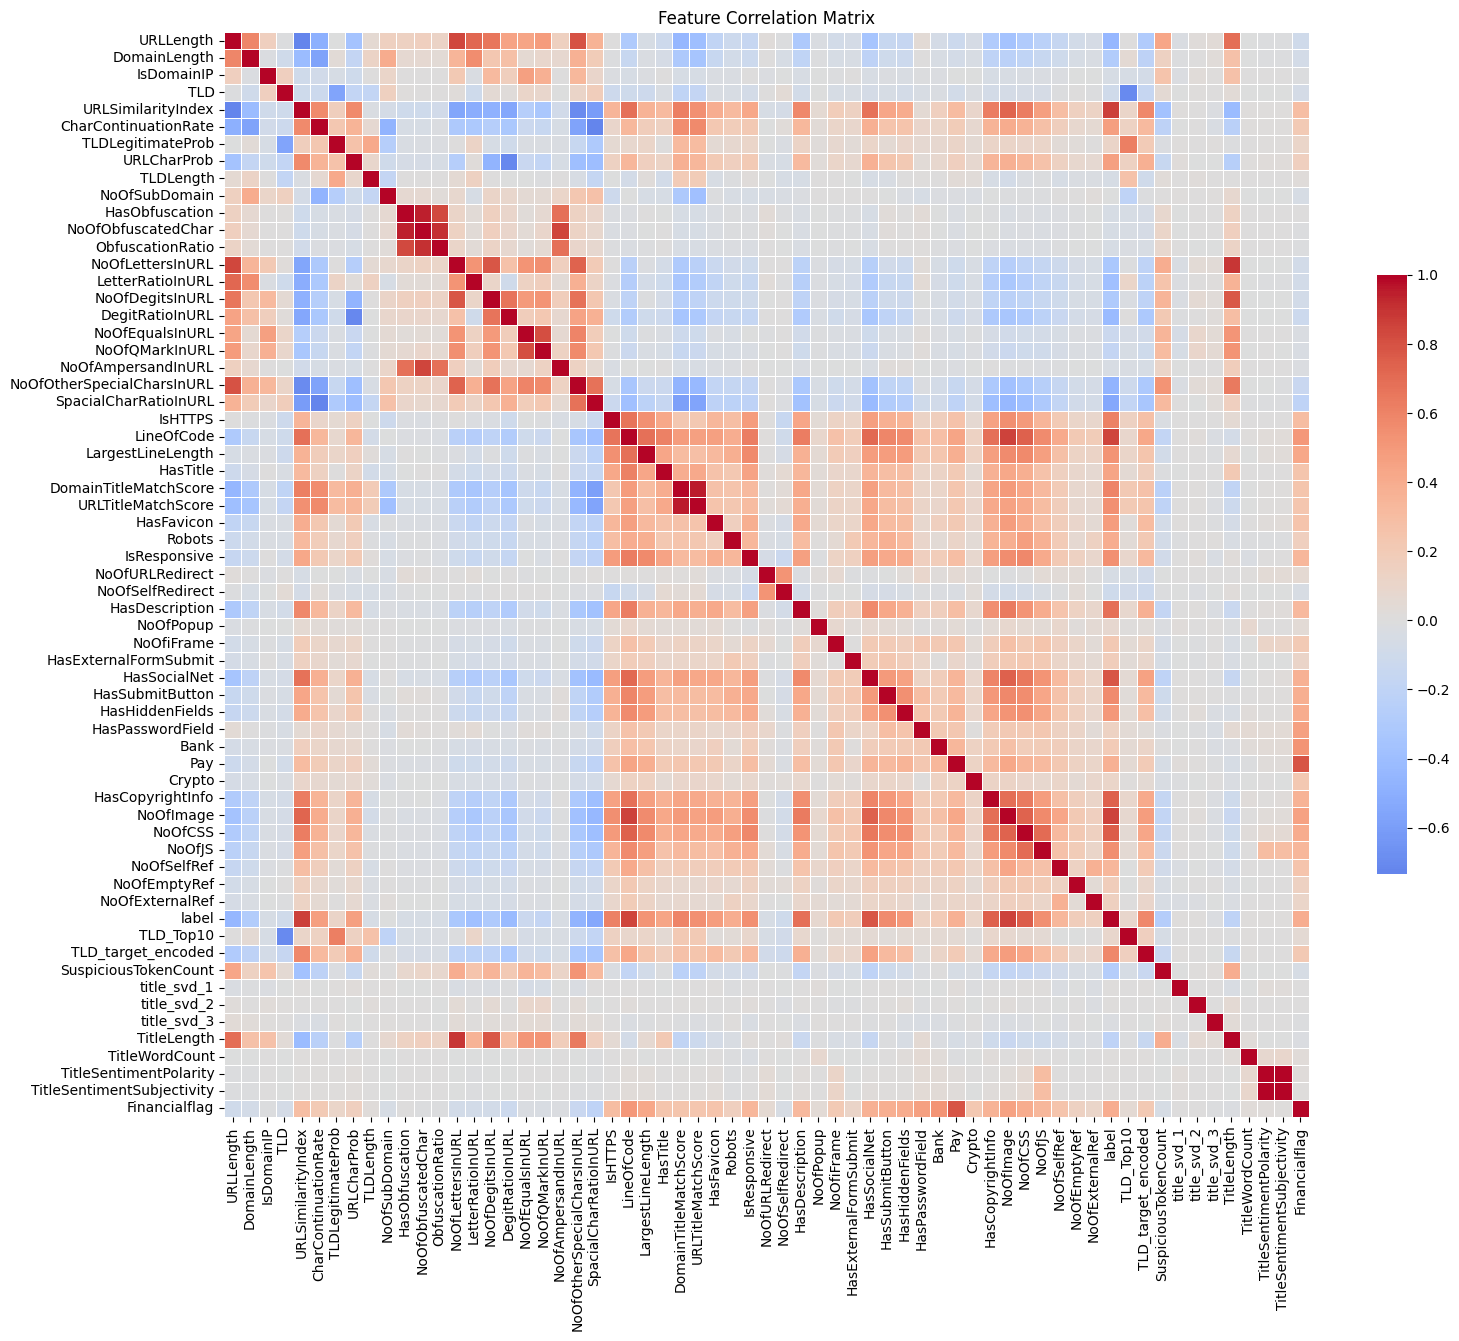

In [23]:
df_corr = df
corr_matrix = df_corr.corr()
# print(corr_matrix)
#get average but not diagonal
avg_corr = (corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
                        .abs().mean().mean())
print(f"Average correlation : {avg_corr:.4f}")

# plot the correlation in heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [24]:
threshold = 0.7
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

print(f"\nHighly correlated features: {to_drop}")

df_selected = df.drop(columns=to_drop)
df_selected.shape

# df_selected = df


Highly correlated features: ['URLSimilarityIndex', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'URLTitleMatchScore', 'HasSocialNet', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'label', 'TLD_Top10', 'TitleLength', 'TitleSentimentSubjectivity', 'Financialflag']


(5500, 42)

### 3.2 Mutual Information

In [25]:
# Refrence: Week 8 Tutorial
# from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif

# df_selected = df.drop(columns=['label'])

X = df_selected
y = df['label']

#  calculate MI scores using mutual_info_classif
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# reformat MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# sort
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print("Mutual Information Scores for Features:")
print(mi_df)

Mutual Information Scores for Features:
                   Feature  MI Score
12              LineOfCode  0.593120
34         NoOfExternalRef  0.561264
32             NoOfSelfRef  0.518597
13       LargestLineLength  0.440306
31        HasCopyrightInfo  0.317887
21          HasDescription  0.279643
11                 IsHTTPS  0.235398
35      TLD_target_encoded  0.204429
15   DomainTitleMatchScore  0.195163
25         HasSubmitButton  0.185225
3                      TLD  0.174372
0                URLLength  0.168723
5        TLDLegitimateProb  0.166220
33            NoOfEmptyRef  0.165902
18            IsResponsive  0.163485
23              NoOfiFrame  0.160420
4     CharContinuationRate  0.139993
26         HasHiddenFields  0.136616
6              URLCharProb  0.124818
16              HasFavicon  0.123861
37             title_svd_1  0.115640
14                HasTitle  0.115073
39             title_svd_3  0.112907
38             title_svd_2  0.106354
1             DomainLength  0.09330

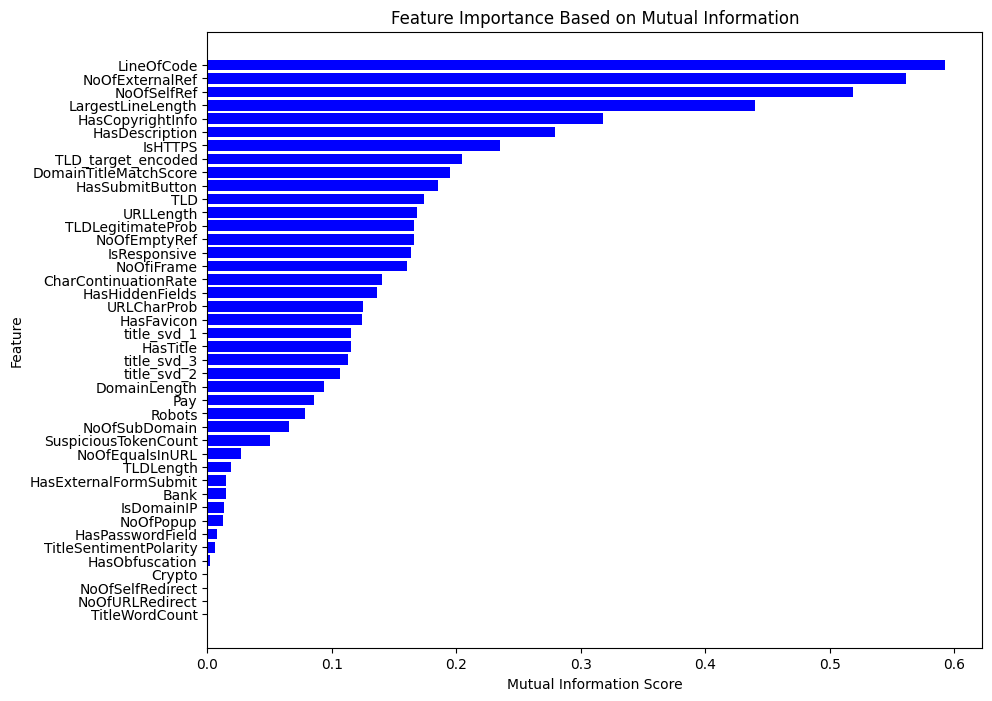

In [26]:

# plot the above MI score in bar charts
plt.figure(figsize=(10, 8))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='blue')

# Add labels and title
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Mutual Information")

plt.gca().invert_yaxis()
plt.show()

In [27]:
#selecting using MI >0.05
selected_features = mi_df[mi_df["MI Score"] > 0.05]["Feature"].tolist()
df_selected = df_selected[selected_features]
print(df_selected.columns)
df_selected.shape

Index(['LineOfCode', 'NoOfExternalRef', 'NoOfSelfRef', 'LargestLineLength',
       'HasCopyrightInfo', 'HasDescription', 'IsHTTPS', 'TLD_target_encoded',
       'DomainTitleMatchScore', 'HasSubmitButton', 'TLD', 'URLLength',
       'TLDLegitimateProb', 'NoOfEmptyRef', 'IsResponsive', 'NoOfiFrame',
       'CharContinuationRate', 'HasHiddenFields', 'URLCharProb', 'HasFavicon',
       'title_svd_1', 'HasTitle', 'title_svd_3', 'title_svd_2', 'DomainLength',
       'Pay', 'Robots', 'NoOfSubDomain'],
      dtype='object')


(5500, 28)

In [28]:
df.shape

(5500, 63)

### 3.3 Chi-Square Test

In [29]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X = df_selected
y = df['label']

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# apply the chi2
chi2_selector = SelectKBest(score_func=chi2, k='all')  # You can choose 'k' features or use 'all'
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_,
    'P-value': chi2_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

# select using p values
chi2_selected_features = chi2_scores[chi2_scores['P-value'] < 0.05]['Feature'].tolist()

df_selected = df_selected[chi2_selected_features]


In [30]:
print(chi2_scores)

                  Feature   Chi2 Score        P-value
4        HasCopyrightInfo  1576.476365   0.000000e+00
5          HasDescription  1457.076708   0.000000e+00
9         HasSubmitButton  1043.377077  6.696543e-229
8   DomainTitleMatchScore   949.297824  1.885295e-208
17        HasHiddenFields   872.069624  1.157857e-191
19             HasFavicon   826.018337  1.189373e-181
26                 Robots   629.186991  7.510061e-139
14           IsResponsive   610.976045  6.862109e-135
25                    Pay   579.043224  6.056187e-128
0              LineOfCode   471.838476  1.275571e-104
6                 IsHTTPS   435.453541   1.056678e-96
7      TLD_target_encoded   254.175833   3.192272e-57
3       LargestLineLength   146.624422   9.480585e-34
21               HasTitle   138.768242   4.949702e-32
16   CharContinuationRate    96.972625   7.029249e-23
11              URLLength    62.481756   2.689243e-15
2             NoOfSelfRef    42.589598   6.751750e-11
12      TLDLegitimateProb   

In [31]:
df_selected.shape

(5500, 24)

In [32]:
df_selected.columns

Index(['HasCopyrightInfo', 'HasDescription', 'HasSubmitButton',
       'DomainTitleMatchScore', 'HasHiddenFields', 'HasFavicon', 'Robots',
       'IsResponsive', 'Pay', 'LineOfCode', 'IsHTTPS', 'TLD_target_encoded',
       'LargestLineLength', 'HasTitle', 'CharContinuationRate', 'URLLength',
       'NoOfSelfRef', 'TLDLegitimateProb', 'NoOfEmptyRef', 'URLCharProb',
       'DomainLength', 'NoOfiFrame', 'NoOfExternalRef', 'TLD'],
      dtype='object')

### 4. IML Models
- k=5 Cross-Validation
- NB, DT, SVC

In [33]:
# Reference: Week 7 Tutorial from Ed
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# ---------------------------
# STEP 1: Generate a synthetic dataset
# ---------------------------

X = df_selected
y = df['label']

# ---------------------------
# STEP 2: Split dataset into training and testing sets
# ---------------------------
# - K folds, k =5

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
#                                                     random_state=42, stratify=y)

# ---------------------------
# STEP 3: Define the machine learning models
# ---------------------------
# We use three different classifiers:
# - Naive Bayes (probabilistic model based on Bayes' theorem)
# - Decision Tree (limited to a max depth of 3 to prevent overfitting)
# - SVC

models = {
    "Naive Bayes":  GaussianNB(),
    "Decision Tree (max_depth=3)": DecisionTreeClassifier(max_depth=3, random_state=42),

    #"Logistic Regression":  LogisticRegression(max_iter=1000, random_state=42),
    "SVM":  SVC(C=1.0, kernel="rbf", probability=True)
}

# ---------------------------
# STEP 4: Train the models and evaluate their performance
# ---------------------------
results = []
conf_matrices = {}  # Dictionary to store confusion matrices for each model

for name, model in models.items():
  for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    # print(X_train,y_train, X_test, y_test)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # Train the model using the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)


    # Compute evaluation metrics
    acc = accuracy_score(y_test, y_pred)  # Overall accuracy
    prec = precision_score(y_test, y_pred, average='macro')  # Average precision across classes
    rec = recall_score(y_test, y_pred, average='macro')  # Average recall across classes
    f1 = f1_score(y_test, y_pred, average='macro')  # Average F1-score across classes
    #Rroc

    # rmse and mae is for regression
    # rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)  # Root Mean Squared Error
    # mae = round(mean_absolute_error(y_test, y_pred), 4)  # Mean Absolute Error


    # Store confusion matrix for visualization
    conf_matrices[name + ' fold ' + str(fold_idx+1)] = confusion_matrix(y_test, y_pred)

    # Append results to the list
    #results.append({"Model": name , "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1, "RMSE": rmse, "MAE": mae })

    results.append({"Model": name + ' fold ' + str(fold_idx+1), "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1})

# ---------------------------
# STEP 5: Display results in a table
# ---------------------------
# Convert the results into a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the performance results of all models
print("Model Comparison Results:")
print(results_df.to_string(index=False))


Model Comparison Results:
                             Model  Accuracy  Precision   Recall  F1-Score
                Naive Bayes fold 1  0.979091   0.981266 0.976259  0.978509
                Naive Bayes fold 2  0.985455   0.987289 0.983183  0.985063
                Naive Bayes fold 3  0.989091   0.989700 0.988011  0.988824
                Naive Bayes fold 4  0.981818   0.983182 0.979773  0.981352
                Naive Bayes fold 5  0.985455   0.986592 0.983764  0.985090
Decision Tree (max_depth=3) fold 1  0.984545   0.984066 0.984333  0.984198
Decision Tree (max_depth=3) fold 2  0.983636   0.982140 0.984651  0.983309
Decision Tree (max_depth=3) fold 3  0.988182   0.987783 0.988052  0.987916
Decision Tree (max_depth=3) fold 4  0.978182   0.976619 0.979067  0.977757
Decision Tree (max_depth=3) fold 5  0.988182   0.987791 0.988057  0.987923
                        SVM fold 1  0.954545   0.951601 0.959889  0.954016
                        SVM fold 2  0.961818   0.958791 0.966218  0.961311

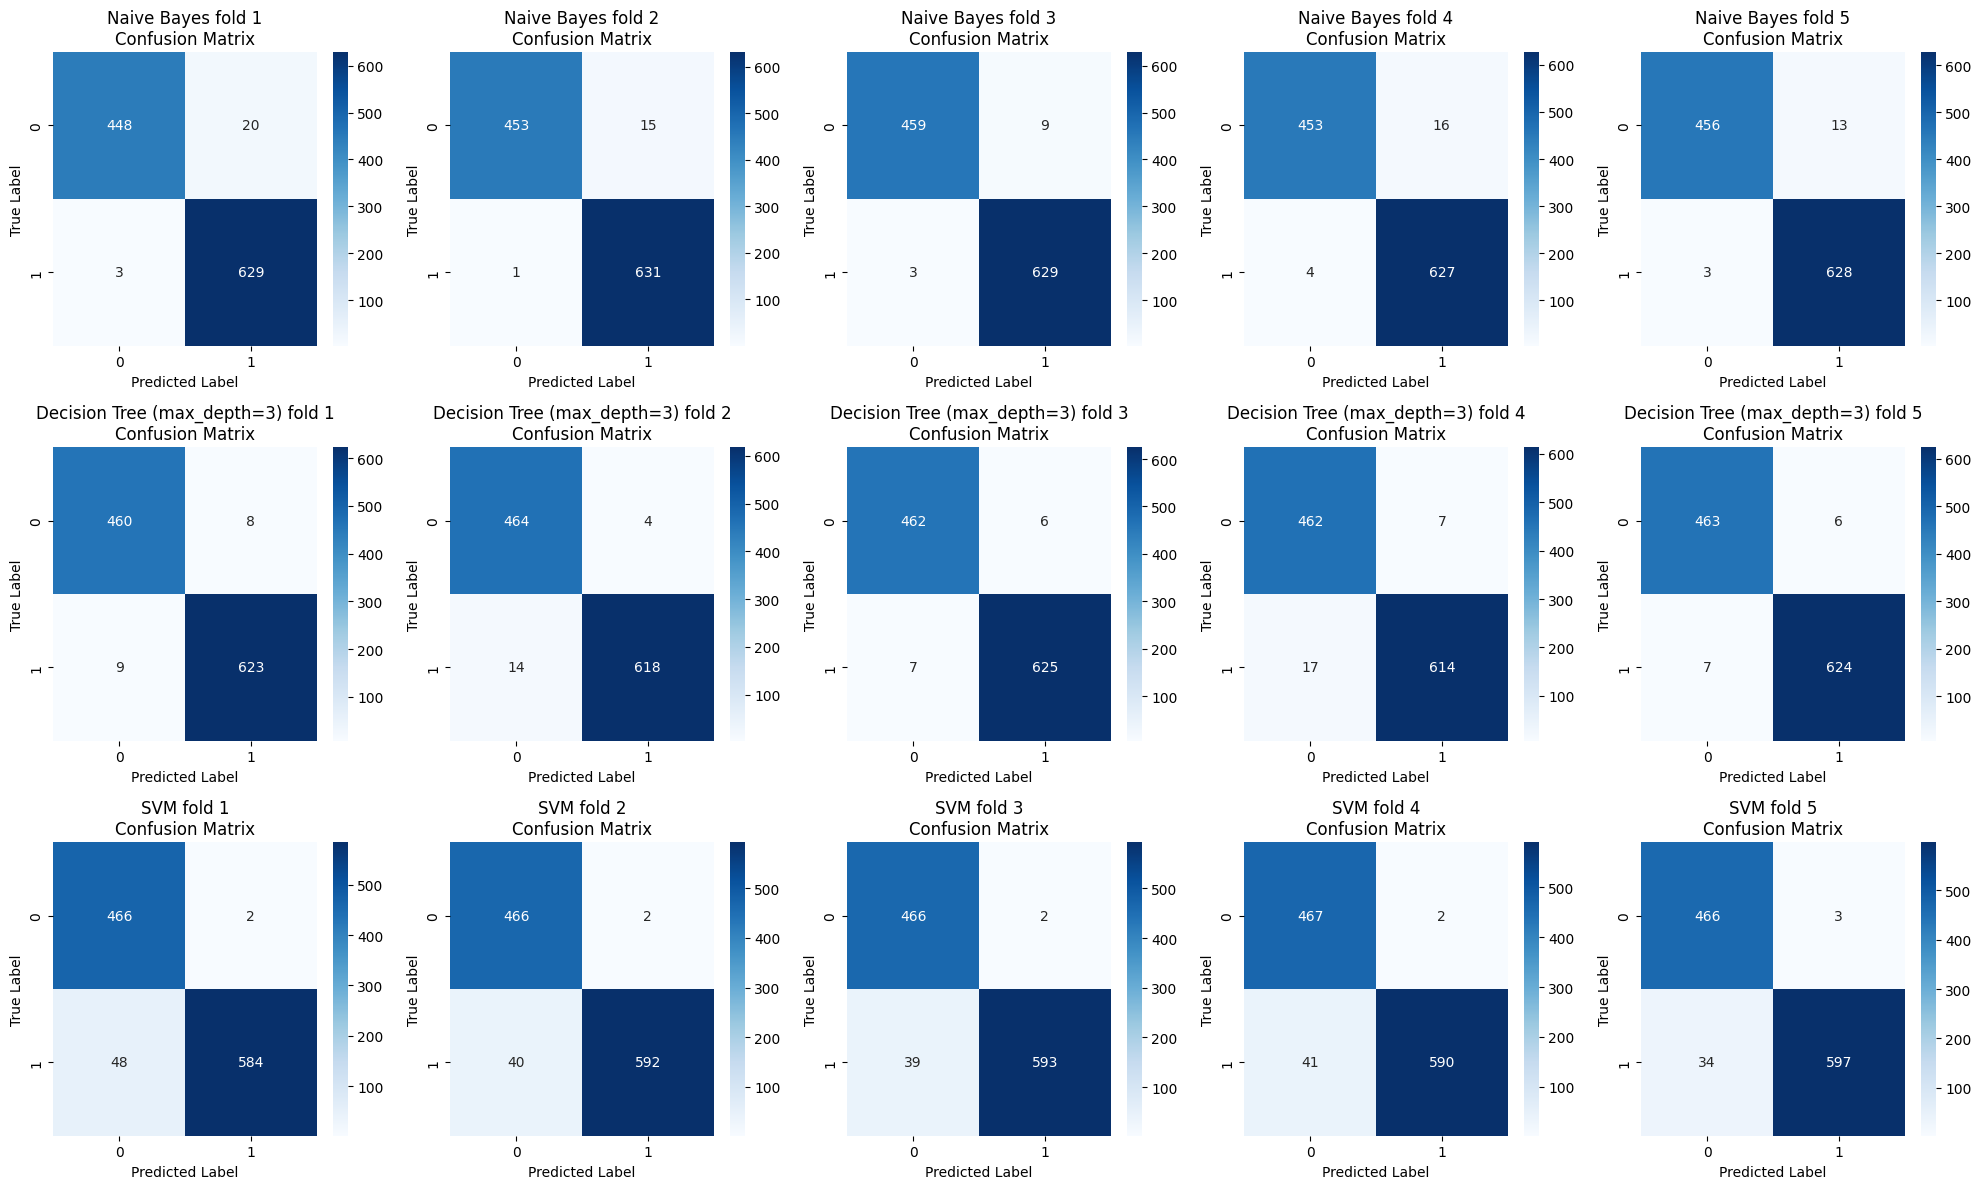

In [34]:
# Reference: Week 7 Tutorial from Ed
import math

# ---------------------------
# STEP 6: Visualize Confusion Matrices
# ---------------------------

n_plots = len(conf_matrices)
n_cols = 5
n_rows = math.ceil(n_plots / n_cols) # 3 rows

# Create a figure with 3x5 subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# Iterate over each model and its corresponding confusion matrix
for i, (name, matrix) in enumerate(conf_matrices.items()):
    # Plot confusion matrix as a heatmap
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')


plt.tight_layout()
plt.show()


In [35]:
# ---------------------------
# STEP 7: Visualize results
# ---------------------------

# Structure the results by model name
results_df['Model_Name'] = results_df['Model'].apply(lambda x: x.split(' fold ')[0])

# Calculate average metrics for each model across all folds
average_results = results_df.groupby('Model_Name')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean().reset_index()

print("\nAverage Performance per Model (across K folds):")
print(average_results.to_string(index=False))



Average Performance per Model (across K folds):
                 Model_Name  Accuracy  Precision   Recall  F1-Score
Decision Tree (max_depth=3)  0.984545   0.983680 0.984832  0.984221
                Naive Bayes  0.984182   0.985606 0.982198  0.983768
                        SVM  0.961273   0.958311 0.965671  0.960769


In [36]:
# Reshape the results DataFrame for plotting
results_melted = results_df.melt(
    id_vars=['Model'],
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    var_name='Metric',
    value_name='Score'
)

# Extract the fold number from the 'Model' column
results_melted['Fold'] = results_melted['Model'].apply(lambda x: int(x.split(' fold ')[-1]))
results_melted['Model_Name'] = results_melted['Model'].apply(lambda x: x.split(' fold ')[0])



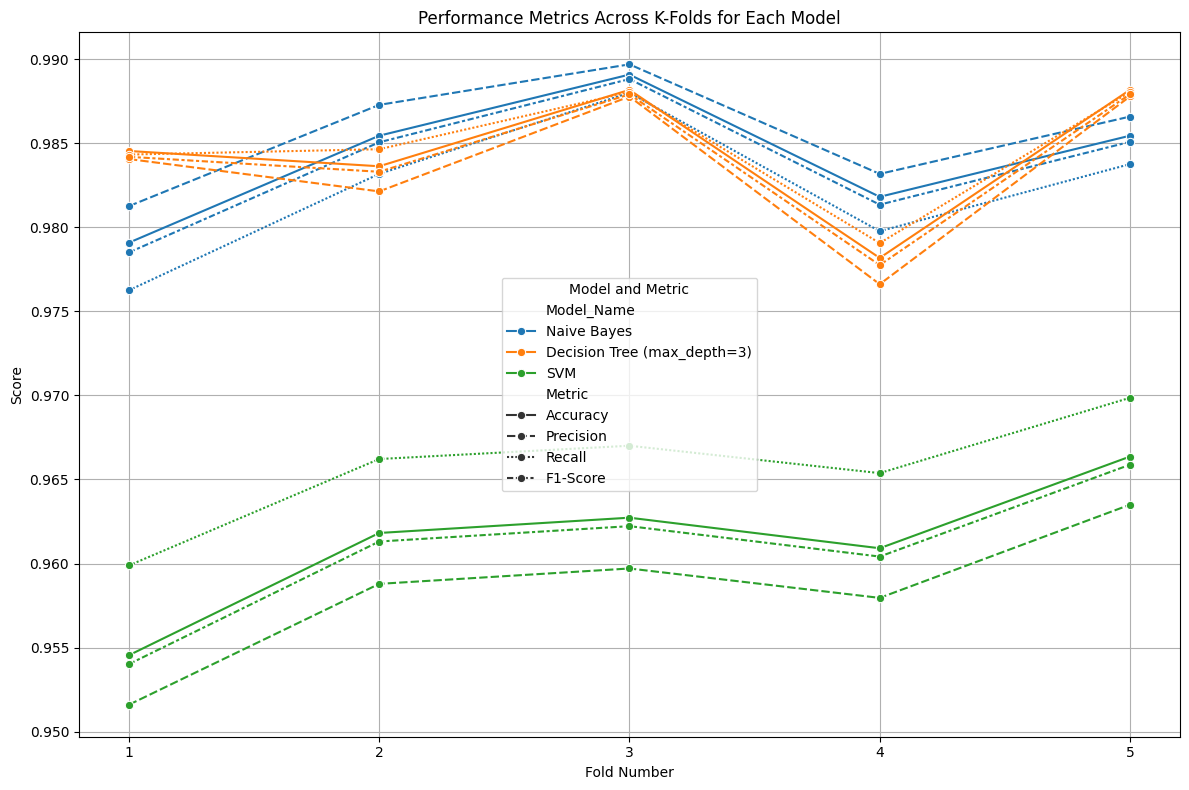

In [37]:
# Plotting the line graphs
plt.figure(figsize=(12, 8))
sns.lineplot(data=results_melted, x='Fold', y='Score', hue='Model_Name', style='Metric', marker='o')
plt.title('Performance Metrics Across K-Folds for Each Model')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(range(1, k + 1)) # Ensure x-axis shows discrete fold numbers
plt.grid(True)
plt.legend(title='Model and Metric')
plt.tight_layout()
plt.show()

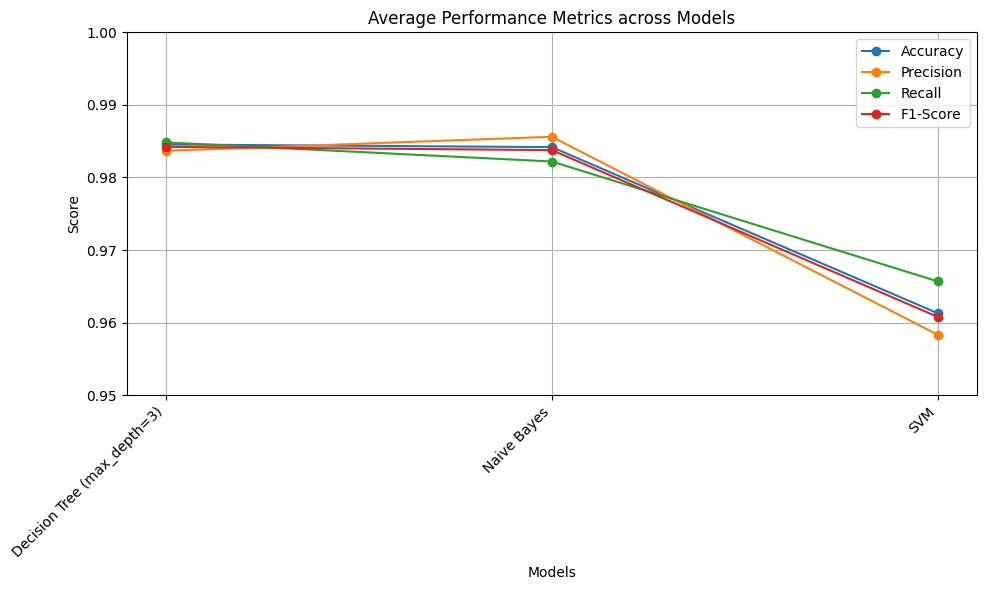

In [38]:

plt.figure(figsize=(10, 6))

plt.plot(average_results['Model_Name'], average_results['Accuracy'], marker='o', label='Accuracy')
plt.plot(average_results['Model_Name'], average_results['Precision'], marker='o', label='Precision')
plt.plot(average_results['Model_Name'], average_results['Recall'], marker='o', label='Recall')
plt.plot(average_results['Model_Name'], average_results['F1-Score'], marker='o', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Average Performance Metrics across Models')
plt.legend()
plt.grid(True)
plt.ylim(0.95, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout
plt.show()


### 5. Nested Cross Validation and Tuning
- k = 5x3 Cross-Validation(Outer k=5, inner=3)
- NB, DT, SVC with tuning

In [39]:
# Reference: Week 12 Tutorial from Ed

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# Define the parameter grids for each algorithm
param_grids = {
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7] # Example hyperparameters
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    # "Logistic Regression": {
    #     'C': [0.1, 1.0, 10.0],
    #     'penalty': ['l2']
    # },
    "SVC": {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf']
    }
}

# Define the algorithms
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC()
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}


# Outer Cross-Validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


inner_results = []
outer_results = []


#Outer loop : divide the data
for fold_idx, (train_idx, test_idx)  in enumerate(outer_cv.split(X, y)):
    print(f"Processing Outer Fold {fold_idx+1} / 5")
    X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
    y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]

    # Inner Cross-Validation : hyperparameter tuning, k =3
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)
    base_train_preds = []
    y_inner_all = []

    # Inner loop checking hyperparameter tuning for all models
    for fold_idx_inner, (inner_train_idx, inner_val_idx) in enumerate(inner_cv.split(X_train_outer, y_train_outer)):
      print(f"  - Inner Fold {fold_idx_inner+1} / 3")
      X_inner_train, X_inner_val = X_train.iloc[inner_train_idx], X_train.iloc[inner_val_idx]
      y_inner_train, y_inner_val = y_train.iloc[inner_train_idx], y_train.iloc[inner_val_idx]

      fold_preds = []

      for name, model in models.items():
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=inner_cv,
            scoring = scoring, # get all scoring above
            refit = 'accuracy', # find the best use accuray
            return_train_score=True
            )
        grid_search.fit(X_inner_train, y_inner_train)

        best_model = grid_search.best_estimator_
        inner_y_pred = best_model.predict(X_inner_val)

        fold_preds.append(inner_y_pred)

        inner_acc = accuracy_score(y_inner_val, inner_y_pred)  # Overall accuracy
        inner_prec = precision_score(y_inner_val, inner_y_pred, average='macro')  # Average precision across classes
        inner_rec = recall_score(y_inner_val, inner_y_pred, average='macro')  # Average recall across classes
        inner_f1 = f1_score(y_inner_val, inner_y_pred, average='macro')  # Average F1-score across classes
        inner_results.append({"Model": name,
                              "Hyperparameters": grid_search.best_estimator_,
                              # "Best Model: ": best_model,
                              "Outer Fold" : fold_idx+1,
                              "Inner Fold": fold_idx_inner+1,
                              "Accuracy": inner_acc,
                              "Precision": inner_prec,
                              "Recall": inner_rec,
                              "F1-Score": inner_f1})


      # Evaluate the best model from the inner loop on the outer test fold
    test_preds = []
    for name, model in models.items():
        model.fit(X_train_outer, y_train_outer)
        y_outer_pred = model.predict(X_test_outer)
        test_preds.append(y_outer_pred)

        # Accuracy of base classifier
        outer_acc = accuracy_score(y_test_outer, y_outer_pred)  # Overall accuracy
        outer_prec = precision_score(y_test_outer, y_outer_pred, average='macro')  # Average precision across classes
        outer_rec = recall_score(y_test_outer, y_outer_pred, average='macro')  # Average recall across classes
        outer_f1 = f1_score(y_test_outer, y_outer_pred, average='macro')  # Average F1-score across classes

        outer_results.append(
            #accuracy_score(y_test, y_base_pred
              {
                  "Model": name + ' fold ' + str(fold_idx_inner+1),
                  "Accuracy": outer_acc,
                  "Precision": outer_prec,
                  "Recall": outer_rec,
                  "F1-Score": outer_f1
                            })

outer_results_df = pd.DataFrame(outer_results)
outer_results_df['Model_Name'] = outer_results_df['Model'].apply(lambda x: x.split(' fold ')[0])


print(inner_results)


# Calculate average metrics for each model across all folds
outer_average_results = outer_results_df.groupby('Model_Name')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean().reset_index()

print(outer_average_results.to_string(index=False))


Processing Outer Fold 1 / 5
  - Inner Fold 1 / 3
  - Inner Fold 2 / 3
  - Inner Fold 3 / 3
Processing Outer Fold 2 / 5
  - Inner Fold 1 / 3
  - Inner Fold 2 / 3
  - Inner Fold 3 / 3
Processing Outer Fold 3 / 5
  - Inner Fold 1 / 3
  - Inner Fold 2 / 3
  - Inner Fold 3 / 3
Processing Outer Fold 4 / 5
  - Inner Fold 1 / 3
  - Inner Fold 2 / 3
  - Inner Fold 3 / 3
Processing Outer Fold 5 / 5
  - Inner Fold 1 / 3
  - Inner Fold 2 / 3
  - Inner Fold 3 / 3
[{'Model': 'Naive Bayes', 'Hyperparameters': GaussianNB(var_smoothing=1e-08), 'Outer Fold': 1, 'Inner Fold': 1, 'Accuracy': 0.9843217450579413, 'Precision': 0.9853539858428534, 'Recall': 0.982746494893046, 'F1-Score': 0.9839677082912621}, {'Model': 'Decision Tree', 'Hyperparameters': DecisionTreeClassifier(max_depth=7, random_state=42), 'Outer Fold': 1, 'Inner Fold': 1, 'Accuracy': 0.9897750511247444, 'Precision': 0.9893007676256622, 'Recall': 0.9898628667187346, 'F1-Score': 0.98957743743739}, {'Model': 'SVC', 'Hyperparameters': SVC(kernel

In [40]:
# print inner data tuning in table
inner_results_df = pd.DataFrame(inner_results)
print("Inner Loop Model Performance Results:")
print(inner_results_df.to_string(index=False))


Inner Loop Model Performance Results:
        Model                                                            Hyperparameters  Outer Fold  Inner Fold  Accuracy  Precision   Recall  F1-Score
  Naive Bayes                                            GaussianNB(var_smoothing=1e-08)           1           1  0.984322   0.985354 0.982746  0.983968
Decision Tree                       DecisionTreeClassifier(max_depth=7, random_state=42)           1           1  0.989775   0.989301 0.989863  0.989577
          SVC                                                       SVC(kernel='linear')           1           1  1.000000   1.000000 1.000000  1.000000
  Naive Bayes                                            GaussianNB(var_smoothing=1e-08)           1           2  0.988412   0.990352 0.985904  0.987980
Decision Tree                       DecisionTreeClassifier(max_depth=7, random_state=42)           1           2  0.990457   0.989246 0.991147  0.990164
          SVC                               


Average Inner Loop Performance per Model and Hyperparameters (across inner folds):
   Model_Name                                                        Hyperparameters_Str  Accuracy  Precision   Recall  F1-Score
Decision Tree                       DecisionTreeClassifier(max_depth=5, random_state=42)  0.990454   0.990131 0.990357  0.990242
Decision Tree DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)  0.989093   0.988636 0.989266  0.988943
Decision Tree  DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42)  0.990114   0.989549 0.990301  0.989911
Decision Tree                       DecisionTreeClassifier(max_depth=7, random_state=42)  0.991051   0.990788 0.990890  0.990829
  Naive Bayes                                                               GaussianNB()  0.978631   0.980652 0.976155  0.978152
  Naive Bayes                                            GaussianNB(var_smoothing=1e-07)  0.985341   0.986273 0.983805  0.984954
  Naive Bayes

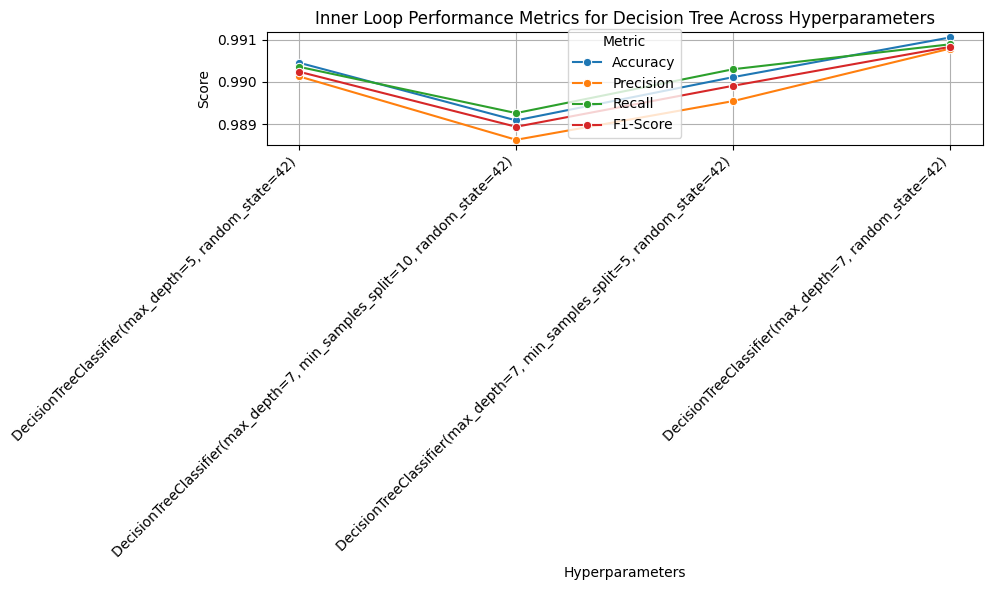

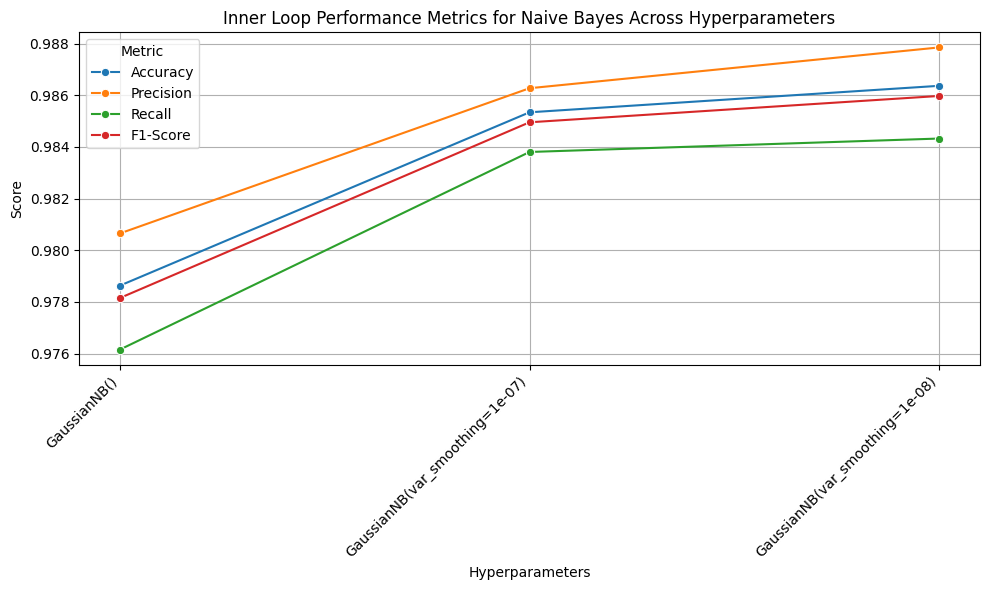

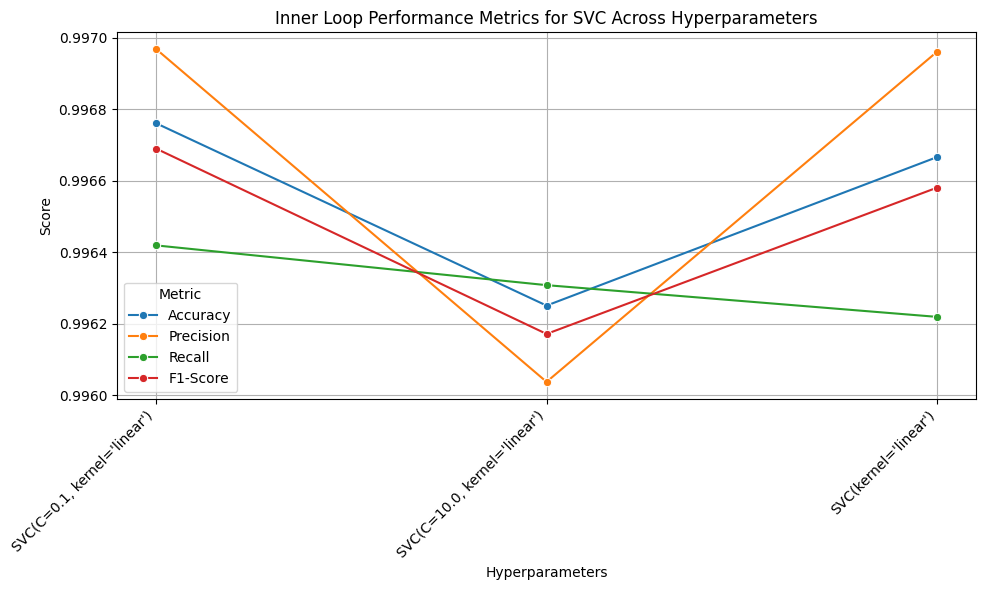

In [41]:
#Visulise the data

inner_results_df = pd.DataFrame(inner_results)

#  results by Model and Hyperparameters
inner_results_df['Model_Name'] = inner_results_df['Model']
inner_results_df['Hyperparameters_Str'] = inner_results_df['Hyperparameters'].astype(str)

# Group by Model and Hyperparameters and get mean
average_inner_results_hp = inner_results_df.groupby(['Model_Name', 'Hyperparameters_Str'])[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean().reset_index()

print("\nAverage Inner Loop Performance per Model and Hyperparameters (across inner folds):")
print(average_inner_results_hp.to_string(index=False))


# Visualize Inner Loop Results by Hyperparameter
for model_name in average_inner_results_hp['Model_Name'].unique():
    model_results = average_inner_results_hp[average_inner_results_hp['Model_Name'] == model_name]

    # Melt for easier plotting
    model_results_melted = model_results.melt(
        id_vars=['Hyperparameters_Str'],
        value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        var_name='Metric',
        value_name='Score'
    )

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=model_results_melted, x='Hyperparameters_Str', y='Score', hue='Metric', marker='o')
    plt.title(f'Inner Loop Performance Metrics for {model_name} Across Hyperparameters')
    plt.xlabel('Hyperparameters')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

